In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [19]:
N = 100
x = np.linspace(-3,3,100).reshape(-1,1)
y_real = 2.5*x
y = 2.5*x-np.random.random(N).reshape(-1,1)*2-1


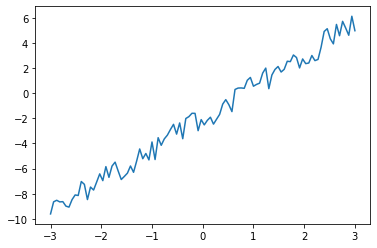

In [29]:
plt.figure()
plt.plot(x,y)
plt.show()

In [4]:
x_with_ones = np.concatenate((x,np.ones([N,1])),axis = 1)
Xouter = x_with_ones.T @ x_with_ones
Xouter_inv = np.linalg.inv(x_with_ones.T @ x_with_ones)

In [5]:
beta1 = np.linalg.inv(x.T @ x) @ x.T @ y
beta2 = np.linalg.inv(x_with_ones.T @ x_with_ones) @ x_with_ones.T @ y

In [6]:
y1 = x @ beta1
y2 = x_with_ones @ beta2

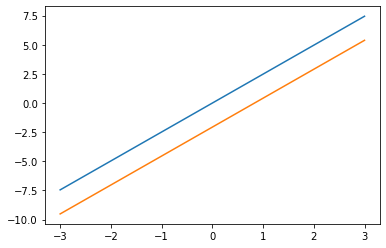

In [34]:
plt.figure()
plt.plot(x,y1),plt.plot(x,y2)
plt.show()

In [7]:
def getmse(y1,y2):
    return np.linalg.norm(y1-y2)**2/len(y1)

In [31]:
print('mse y1-yreal:',getmse(y1,y_real))
print('mse y2-yreal:',getmse(y2,y_real))

print('mse y1-y:',getmse(y1,y))
print('mse y2-y:',getmse(y2,y))

mse y1-yreal: 0.0009684597831635171
mse y2-yreal: 4.258133288885265
mse y1-y: 4.085232329128738
mse y2-y: 0.3612136816793021


In [9]:
def getmape(y1,y_obs):
    return np.mean(abs((y1-y_obs)/y_obs))*100

In [32]:
print('mape y1-yreal:',getmse(y1,y_real))
print('mape y2-yreal:',getmse(y2,y_real))

print('mape y1-y:',getmse(y1,y))
print('mape y2-y:',getmse(y2,y))

mape y1-yreal: 0.0009684597831635171
mape y2-yreal: 4.258133288885265
mape y1-y: 4.085232329128738
mape y2-y: 0.3612136816793021


小结:


In [11]:
def Linregress(X,y,need_bias = True):
    if need_bias:
        return
    else:
        beta = np.linalg.inv(x.T @ x) @ x.T @ y 
        y_pred = x @ beta
        return y_pred,beta